# SNAP ELIGIBILITY Classification by Socio Economic Features
## Author: Liana Principe

__Index__<a id = 'Index'> </a>

#### Data Cleaning and Organization
    
- [Null Values](#null_values) <br>
- [Splitting and Scaling](#split_scale) <br>
- [Feature Selection: Decision Trees](#feature_selection_decision_tree) <br>
- [Feature Selection: PCA](#feature_selection_pca) <br> 

#### Preliminary Model Testing
- [Logistic Regression](#statsmodel_logistic_regression)<br>
 
#### Hyperparameter Optimization
- [GridSearchCV](#hyperparameter_optimization):  Logistic Regression, SVM, Boosted Random Forest  

#### Model Building
[d](#model_building)

#### Final Models

#### Results
- [Analysis](#results)
    
    
##### Import Packages

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly as pt
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

import data_processing
import model
#import all metrics
#import sklearn.metrics

In [3]:
all_df = pd.read_csv('C:/Users/liana.principe/OneDrive - insidemedia.net/Documents/Coding & Portfolio/Bootcamp/Capstone Project/faps_household_puf (2).csv', index_col = 'hhnum')

reference_file = pd.read_csv('C:/Users/liana.principe/OneDrive - insidemedia.net/Documents/Coding & Portfolio/Bootcamp/Capstone Project/SNAPHH_column_reference.csv')

snap_target = reference_file['Target_variables'].loc[reference_file['Target_variables'].notnull()]
socio_economic = reference_file['Socio_economic'].loc[reference_file['Socio_economic'].notnull()]
food_support = reference_file['Food_support'].loc[reference_file['Food_support'].notnull()]
nutrition_survey = reference_file['Nutrition_survey'].loc[reference_file['Nutrition_survey'].notnull()]
food_security_survey = reference_file['Food_security_survey'].loc[reference_file['Food_security_survey'].notnull()]
shopping_survey = reference_file['Shopping_survey'].loc[reference_file['Shopping_survey'].notnull()]
snap_variables = reference_file['SNAP_variables'].loc[reference_file['SNAP_variables'].notnull()]
discard_cols =reference_file['Discard_variables'].loc[reference_file['Discard_variables'].notnull()]

pd.options.display.max_rows = 300
pd.options.display.max_columns = 300
divider = '='*80

The document is read into jupyter notebook with a reference file that separates and consolidates the variables into specific lists. This is included for easier organization of variable categories.

Snap Target = the variables of interest in this study. Comprised of household SNAP benefit receivers at various time periods (currently, recently, or ever)

Socio-Economic = features of a household that reveal insight to the social or economic status of the Household. This will be the foundation of features of interest used for the model

Food Support = Reveals information of household usage of alternative food support resources (WIC, food pantries, etc). Although informative, this information is separated because there is a chance of high correlation with the target dependent variable. As such these are put in an individual column to be included or excluded with ease according to the needs of this study.

Nutrition Survey = Nutrition Survey results that are included in the dataset. These are separated from the foundational features of interest because this information may be beneficial as an addition, but is not always gauranteed to be provided. As such, it is consolidated to it's own section to be included and excluded in an easier manner.

Food Security Survey = Food Security Survey results from respondents in the ERS survey. While this is informative

Shopping Survey = Exluded because this information is not likely available in the real world

SNAP Variables = SNAP administrative data that will be exluded from the logistic model due to data leakage with the ideology that rows with non-NaN values in these columns are heavily correlated if not directly to those experiencing food insecurity. These variables are likely expected to introduce data leakage

Discarded Variables: These are variables that will not be considered in this study due to irrelevance, data leakage, or other reasons. Some of these variables are inputed for the survey administration team which is important for organization of the data in the dataset, but pose no meaning for model building. Within the data, there are two granularities of data calculation: one at the household level and one at the family level. This research is following the data at the household level, but the family level data is exlucded to prevent confusion in the model. Lastly, other variables are excluded due to irrelevance of the model or question that leads this research.

Further details of the variables can be seen in the documentation

### Target Variable
Because this portion of the study focuses on survey respondents who have utilized SNAP benefits, the target variable in this study will be `elig_units1`, which classifies whether or not a household meets the eligibility requirements in order to utilize SNAP benefits. 


## Data Cleaning and Organization

In [4]:
#Organize data (contains nulls)
x,y, df, nulls_df = data_processing.SNAP_clean(all_df, socio_economic, 'elig_units1')
print(f'''Full Dataframe Shape: {df.shape}
X Shape: {x.shape}
Y Shape: {y.shape}''')

display(df.head())
nulls_df

Full Dataframe Shape: (4826, 99)
X Shape: (4826, 98)
Y Shape: (4826,)


,nonmetro,region,rural,resunitsize,hhsize,numguests,guestspay,hhsizechange,hhsizechild,hhsizemove,hhsizechangeoth,inchhavg_r,pctpovguidehh_r,povguide_hh,povthresh_hh,inchhreported_r,selfemployhh,selfemployfoodhh,jobchangeany,jobchangecat,earnlessnum_r,earnmorenum_r,earnsamenum,housingown,housingpub,housingsub,liqassets,anyvehicle,vehiclenum,caraccess,largeexp,exprentmrtg_r,exphomeins_r,expproptax_r,exppubtrans_r,expelectric_r,expheatfuel_r,expwastedisp_r,exphealthins_r,expcopay_r,expdoctor_r,exprx_r,expchildcare_r,expchildsupport_r,expadultcare_r,schservebrkfst,anypregnant,primstoredist_s,primstoredist_d,primstoretime_d,primstoredist_w,primstoretime_w,primstoretravelmode,primstoretravelcost,primstoretraveltime,altstoredist_s,altstoredist_d,altstoretime_d,altstoredist_w,altstoretime_w,foodstorenum,shopconv,shopbigbox,shopclub,shopdollar,shopbakery,shopmeatfish,shopvegstand,shopanyother,shopothnone,gardenown,gardenelse,farmersmarket,huntfish,anyvegetarian,anylactoseintol,anyfoodallergy,allergywheat,allergymilk,allergyegg,allergyfish,allergyshellfish,allergycorn,allergypeanut,allergyothnut,allergysoy,allergyoth,anydieting,anytobacco,anyillness,billpayprob6mos,evicted6mos,utilnotpaid6mos,cashadv6mos,paydayloan6mos,ndinnersouthh,nmealshome,nmealstogether,elig_units1
hhnum,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100012,1,3,1,5,5,0,0,0,0,0,0,4667.330078,207.360092,2250.833252,2340.583252,4667.330078,0,0,1,1,0,0,1,1,0,0,1,1,2,0,0,500.0,0.0,0.0,0.0,289.0,0.0,17.0,411.670013,0.0,0.0,18.0,0.0,0.0,0,1,0,0.327,0.682,2.37,0.662,12.450000,1,0.0,4,0.857,1.455,7.80,1.444,28.77,5,1,1,0,1,1,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,9,2,0
100015,0,3,0,1,1,0,0,0,0,0,0,1200.000000,128.916748,930.833313,995.416687,1200.000000,1,0,0,0,0,0,0,1,1,0,1,1,1,0,0,290.0,0.0,0.0,0.0,88.0,0.0,0.0,98.000000,20.0,0.0,125.0,0.0,0.0,0,0,0,1.042,1.352,7.38,0.000,0.000000,1,0.0,5,0.000,0.000,0.00,0.000,0.00,5,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,0,1
100024,0,2,0,2,2,0,0,0,0,0,0,5024.500000,398.506287,1260.833374,1318.750000,5024.500000,0,0,1,1,0,1,0,1,0,0,1,1,2,0,0,1125.0,13.0,0.0,0.0,125.0,50.0,49.0,300.000000,0.0,0.0,65.0,0.0,0.0,0,1,0,0.895,1.208,3.77,1.195,23.780001,1,0.0,3,1.968,2.397,6.73,0.000,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,2,0
100026,0,3,1,3,2,1,0,0,0,0,0,1800.000000,142.762726,1260.833374,1281.166626,1800.000000,0,0,0,0,0,0,0,2,0,0,1,1,1,0,1,0.0,0.0,0.0,0.0,132.0,0.0,0.0,166.830002,80.0,100.0,150.0,0.0,0.0,0,0,0,1.715,4.358,9.98,0.000,0.000000,1,0.0,5,1.714,4.357,9.98,0.000,0.00,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,2,7,21,0
100028,0,1,0,7,7,0,0,1,0,1,0,3998.000000,137.348984,2910.833252,3101.416748,3998.000000,0,0,1,1,1,0,0,1,0,0,1,1,1,0,0,475.0,0.0,0.0,0.0,86.0,70.0,100.0,31.000000,0.0,0.0,3.0,0.0,0.0,0,0,0,1.246,1.548,4.23,0.000,0.000000,1,0.0,15,2.383,3.019,7.57,0.000,0.00,5,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,7,3,1


,nulls
altstoredist_s,26
altstoredist_d,26
altstoretime_d,26
altstoredist_w,26
altstoretime_w,26


## Removing Rows with Null Values <a id = null_values> </a>

In [5]:
x_cleaned, y_cleaned, df_cleaned = data_processing.delete_nans(df, 'elig_units1', 0)
print(f'''Cleaned Dataframe Shape: {df_cleaned.shape}
Cleaned X Shape: {x_cleaned.shape}
Cleaned Y Shape: {y_cleaned.shape}''')

Cleaned Dataframe Shape: (4800, 99)
Cleaned X Shape: (4800, 98)
Cleaned Y Shape: (4800,)


In [6]:
print(f"Count of Outputs\n{df_cleaned['elig_units1'].value_counts()}\n{divider}\nPercentage of Outputs\n{df_cleaned['elig_units1'].value_counts(normalize = True)*100}")

Count of Outputs
1    2572
0    2228
Name: elig_units1, dtype: int64
Percentage of Outputs
1    53.583333
0    46.416667
Name: elig_units1, dtype: float64


From the dataset, it shows that 46%  of households that participated in the FoodSNAPS survey are eligible to recieve SNAP benefits. 

## Feataure Selection: Decision Trees

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

eligible_model = DecisionTreeClassifier(random_state = 1)

After removing null values, the next step was to run the non-null dataframe into a Decision Tree for feature selection. For each iteration of the funciton, a Decision Tree was created for all the features in the dataset. Once fitted, the model identifies any features that were insignificant or had a feature importance of 0 when determining the target variable of SNAP benefit usage. For future use of the model, insignificant features or features that are not necessary for SNAP benefit detection will be removed for ease of model building in the rest of this study. These features are identified, recorded, and dropped from the dataset. Then another iteration of the function is run to search for any other insignificant features.

Decision Trees do not need to be scaled and because this is being run as a preliminary feature selection, it does not need to be split into test or train. As such, the original cleaned data will be the input into the Decision Tree below. <br>
Inputs: `x_cleaned`  `y_cleaned`

In [8]:
DecisionTree_feature_selection_dict = {}
#Iteration 1
variables_remove_1 = data_processing.feature_selection_dt(eligible_model, x_cleaned, y_cleaned)
DecisionTree_feature_selection_dict['Iteration 1']= variables_remove_1

98 Columns Originally 
20 Discard Variables



In [9]:
#Iteration 2
iteration_x2= x_cleaned.drop(columns = variables_remove_1)
variables_remove_2 = data_processing.feature_selection_dt(eligible_model, iteration_x2, y_cleaned)
DecisionTree_feature_selection_dict['Iteration 2']= variables_remove_2

78 Columns Originally 
11 Discard Variables



In [10]:
#Iteration 3
iteration_x3= iteration_x2.drop(columns = variables_remove_2) 
variables_remove_3 = data_processing.feature_selection_dt(eligible_model, iteration_x3, y_cleaned)
DecisionTree_feature_selection_dict['Iteration 3']=variables_remove_3

67 Columns Originally 
2 Discard Variables



In [11]:
#Iteration 4
iteration_x4= iteration_x3.drop(columns = variables_remove_3) 
variables_remove_4 = data_processing.feature_selection_dt(eligible_model, iteration_x4, y_cleaned)
DecisionTree_feature_selection_dict['Iteration 4']=variables_remove_4

65 Columns Originally 
3 Discard Variables



In [12]:
#Iteration 5
iteration_x5= iteration_x4.drop(columns = variables_remove_4) 
variables_remove_5 = data_processing.feature_selection_dt(eligible_model, iteration_x5, y_cleaned)
DecisionTree_feature_selection_dict['Iteration 5']=variables_remove_5

62 Columns Originally 
0 Discard Variables



,feature,importance
9,inchhreported_r,0.560904
7,pctpovguidehh_r,0.182934
6,inchhavg_r,0.017619
24,expelectric_r,0.017593
35,primstoredist_s,0.016479
41,primstoretraveltime,0.012032
36,primstoredist_d,0.011384
27,exphealthins_r,0.010000
21,exphomeins_r,0.008104
47,foodstorenum,0.007740


In [13]:
X_feature_selection = iteration_x5.copy()

Below is a summary of all the variables that were removed in each iteration of the Decision Tree Process

In [14]:
display(DecisionTree_feature_selection_dict)

{'Iteration 1': ['guestspay',
  'hhsizechild',
  'jobchangeany',
  'earnlessnum_r',
  'shopbigbox',
  'shopbakery',
  'shopvegstand',
  'shopanyother',
  'allergywheat',
  'allergymilk',
  'allergyegg',
  'allergyshellfish',
  'allergycorn',
  'allergypeanut',
  'allergyothnut',
  'allergysoy',
  'allergyoth',
  'anydieting',
  'evicted6mos',
  'paydayloan6mos'],
 'Iteration 2': ['hhsize',
  'hhsizechange',
  'hhsizemove',
  'povguide_hh',
  'selfemployhh',
  'largeexp',
  'expadultcare_r',
  'primstoretravelcost',
  'shopdollar',
  'farmersmarket',
  'utilnotpaid6mos'],
 'Iteration 3': ['anyillness', 'cashadv6mos'],
 'Iteration 4': ['jobchangecat', 'shopclub', 'gardenown'],
 'Iteration 5': []}

When there are no other insignificant features in the dataset (all features have a feature importance > 0), the function will display the remianing list of features. These features will move on future stages of model building. With the current dataset the study has, 5 iterations of the functions were required to reduce feature size from the original 98 features down to 62 columns.

While all features have a significance greater than 0, that is not to say that that significance is large. In other words, some of the features have a significance that is marginally larger than the set threshold of 0. The likelihood of these features to offer no additional significance will be present in the model biulding stage and will be removed at that time.

### Splitting and Scaling

In [14]:
from sklearn.preprocessing import StandardScaler,  MinMaxScaler

To further prepare for model building, the results from the feature selection will be split into a test and trains and caled as best practice for model learning. Because the majority of variables in this dataset are coded as binary (0 or 1), MinMaxScaling will be used as the Scaling method. 
Inputs: `X_feature_selection`, `y_cleaned`

In [15]:
#SPLITTING the data from important features of decision tree
X_train, X_test, y_train, y_test = train_test_split( X_feature_selection, y_cleaned, test_size=0.2, random_state=1)

# SCALING the data
scale= MinMaxScaler().fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

## Feature Selection: PCA Transformation

In [16]:
from sklearn.decomposition import PCA

In [17]:
#Preliminary PCA transformation with full dataset
PCA_se = PCA()
X_pca = PCA_se.fit(X_train_scaled).transform(X_train_scaled)
expl_var = PCA_se.explained_variance_ratio_
cumulative_sum = np.cumsum(expl_var)

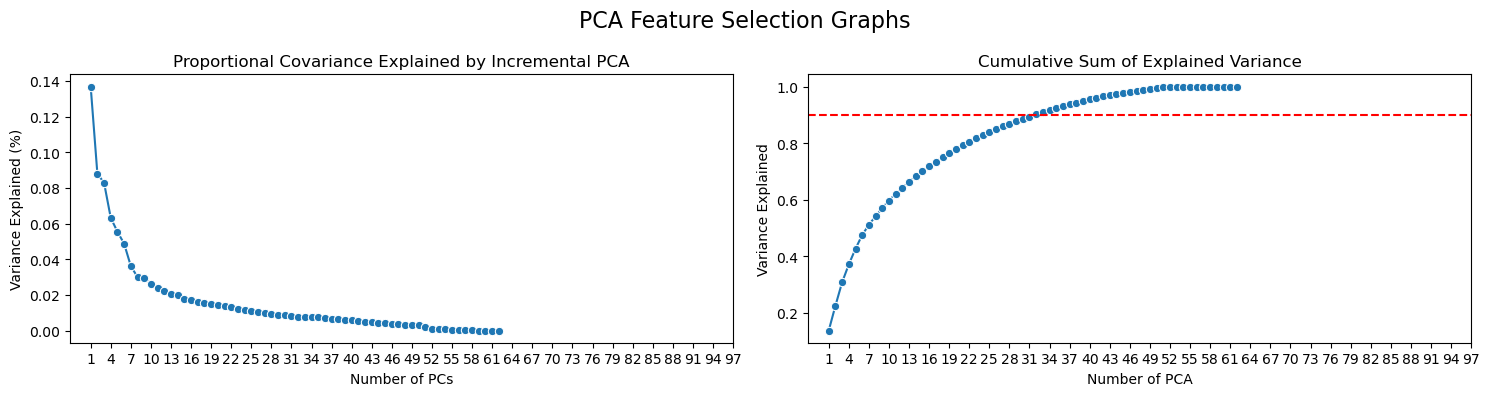

In [19]:
#Graphing N-Components for PCA
fig, ax = plt.subplots(1,2, figsize = (15,4))
fig.suptitle('PCA Feature Selection Graphs', fontsize = 16)
plt.subplot(1,2,1)
prop_variation = sns.lineplot(x = range(1,expl_var.shape[0]+1),y = expl_var,marker='o')
prop_variation.set(title = 'Proportional Covariance Explained by Incremental PCA',xlabel='Number of PCs', ylabel='Variance Explained (%)', xticks = range(1,99,3))

plt.subplot(1,2,2)
cum_variation = sns.lineplot( x = range(1,cumulative_sum.shape[0]+1), y = cumulative_sum, marker='o')
cum_variation.set(title = 'Cumulative Sum of Explained Variance', xlabel ='Number of PCA',ylabel = 'Variance Explained', xticks = range(1,99,3))       
plt.axhline(0.9, c='r', linestyle='--')

plt.tight_layout()
plt.show()

In [18]:
#PCA with Feature Selection
PCA_se = PCA(n_components = .9)
PCA_se= PCA_se.fit(X_train_scaled)
X_train_pca = PCA_se.transform(X_train_scaled)
X_test_pca = PCA_se.transform(X_test_scaled)

pca_formula = PCA_se.components_
print(f'Original: {X_train.shape}')
print(f'PCA Transformation: {X_train_pca.shape}')

Original: (3840, 62)
PCA Transformation: (3840, 32)


With PCA transformation, the dataset has been consolidated from its original 62 features to 32 features, nearly a 50% decrease in variables.

### Data and Variables Summary
Now we have 3 different types of dataset that can be used and tested in models
* **Original Data Variables:** `df`, `x`, `y`
* **Cleaned (non_null) Variables:** `df_cleaned`, `x_cleaned`, `y_cleaned`
* Feature Selection: Decision Tree: `X_feature_selection`, `y_cleaned`
<br>           
<br>  
* Original Data: <br>
            - `X_train`, `y_train` <br>
            - `X_test` , `y_test`
* Scaled Data:  <br>
            - `X_train_scaled` , `y_train_s` <br>
            - `X_test_scaled` ,  `y_test_s` <br>
                         
* Feature Selection: PCA <br>
             - `X_train_PCA` , `y_train_s` <br>
             - `X_test_PCA` , `y_test_s`

## Logistic Regression Model <a id = 'statsmodel_logistic_regression'></a>

[Back to Index](#Index)

In [19]:
from sklearn.linear_model import LogisticRegression

Logistic Regression will be run with the statsmodel package in order to access the hypothesis testing for the coefficients produced by the model.

Because this is a Logistic Regression, additional metrics should be prioritized when evaluating the model rather than the default returned R^2 value.

The run_log function will report back on a diverse set of metrics in order to make a well rounded analysis:

* Accuracy
* True Positive Rate
* True Negative Rate
* Confusion Matrix
* Recall
* Precision
* F1

##### Logisitc Regression Model with Original Data (all features, unscaled)

In [20]:
#Sklearn Logistic Regression with full original dataset
#Run the model

model.run_log(LogisticRegression(), X_train, y_train, results= True)


        Accuracy:                  0.91
        Recall/True Positive Rate: 0.93
        False Positive:            0.12
        AUC Score:                 0.96
               Predicted Non-SNAP  Predicted SNAP
True Non-SNAP                1571             216
True SNAP                     147            1906
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1787
           1       0.90      0.93      0.91      2053

    accuracy                           0.91      3840
   macro avg       0.91      0.90      0.90      3840
weighted avg       0.91      0.91      0.91      3840



(0.90546875,
 0.9283974671212859,
 0.8982092365692743,
 0.9130538922155689,
 0.1208729714605484,
 0.9633252660130494,
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.59597090e-04,
        5.59597090e-04, 1.11919418e-03, 1.11919418e-03, 1.67879127e-03,
        1.67879127e-03, 2.79798545e-03, 2.79798545e-03, 3.35758254e-03,
        3.35758254e-03, 3.91717963e-03, 3.91717963e-03, 4.47677672e-03,
        4.47677672e-03, 5.03637381e-03, 5.03637381e-03, 5.59597090e-03,
        5.59597090e-03, 6.15556799e-03, 6.15556799e-03, 6.71516508e-03,
        6.71516508e-03, 7.83435926e-03, 7.83435926e-03, 8.39395635e-03,
        8.39395635e-03, 8.95355344e-03, 8.95355344e-03, 9.51315053e-03,
        9.51315053e-03, 1.00727476e-02, 1.00727476e-02, 1.06323447e-02,
        1.06323447e-02, 1.11919418e-02, 1.11919418e-02, 1.17515389e-02,
        1.17515389e-02, 1.23111360e-02, 1.23111360e-02, 1.28707331e-02,
        1.28707331e-02, 1.34303302e-02, 1.34303302e-02, 1.39899273e-02,
        1.39899273

##### Logistic Regression Model with Scaled Data (Decision Tree reduced features)

In [21]:
#Sklearn Logistic Regression with Scaled dataset after Decision Tree feature selection
#Run the model
model.run_log(LogisticRegression(), X_train_scaled, y_train, results = True)


        Accuracy:                  0.88
        Recall/True Positive Rate: 0.93
        False Positive:            0.17
        AUC Score:                 0.96
               Predicted Non-SNAP  Predicted SNAP
True Non-SNAP                1482             305
True SNAP                     140            1913
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1787
           1       0.86      0.93      0.90      2053

    accuracy                           0.88      3840
   macro avg       0.89      0.88      0.88      3840
weighted avg       0.89      0.88      0.88      3840



(0.8841145833333334,
 0.9318071115440818,
 0.8624887285843101,
 0.895808944041208,
 0.1706771124790151,
 0.9563620574092644,
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.59597090e-04,
        5.59597090e-04, 1.11919418e-03, 1.11919418e-03, 1.67879127e-03,
        1.67879127e-03, 2.23838836e-03, 2.23838836e-03, 2.79798545e-03,
        2.79798545e-03, 3.35758254e-03, 3.35758254e-03, 3.91717963e-03,
        3.91717963e-03, 4.47677672e-03, 4.47677672e-03, 5.03637381e-03,
        5.03637381e-03, 6.15556799e-03, 6.15556799e-03, 7.27476217e-03,
        7.27476217e-03, 7.83435926e-03, 7.83435926e-03, 8.39395635e-03,
        8.39395635e-03, 8.95355344e-03, 8.95355344e-03, 9.51315053e-03,
        9.51315053e-03, 1.00727476e-02, 1.00727476e-02, 1.06323447e-02,
        1.06323447e-02, 1.11919418e-02, 1.11919418e-02, 1.17515389e-02,
        1.17515389e-02, 1.23111360e-02, 1.23111360e-02, 1.28707331e-02,
        1.28707331e-02, 1.34303302e-02, 1.34303302e-02, 1.39899273e-02,
        1.3

##### Logistic Regression Model with PCA Data

In [22]:
#Sklearn Logistic Regression with Scaled data after Decision Tree Feature Selection
#Run the model
model.run_log(LogisticRegression(),X_train_pca, y_train, results = True)


        Accuracy:                  0.84
        Recall/True Positive Rate: 0.89
        False Positive:            0.22
        AUC Score:                 0.92
               Predicted Non-SNAP  Predicted SNAP
True Non-SNAP                1389             398
True SNAP                     231            1822
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1787
           1       0.82      0.89      0.85      2053

    accuracy                           0.84      3840
   macro avg       0.84      0.83      0.83      3840
weighted avg       0.84      0.84      0.84      3840



(0.8361979166666667,
 0.887481734047735,
 0.8207207207207208,
 0.8527966300023403,
 0.22271964185786233,
 0.9195101494775686,
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.59597090e-04,
        5.59597090e-04, 1.11919418e-03, 1.11919418e-03, 1.67879127e-03,
        1.67879127e-03, 2.23838836e-03, 2.23838836e-03, 2.79798545e-03,
        2.79798545e-03, 3.35758254e-03, 3.35758254e-03, 3.91717963e-03,
        3.91717963e-03, 4.47677672e-03, 4.47677672e-03, 5.03637381e-03,
        5.03637381e-03, 5.59597090e-03, 5.59597090e-03, 6.15556799e-03,
        6.15556799e-03, 6.71516508e-03, 6.71516508e-03, 7.27476217e-03,
        7.27476217e-03, 7.83435926e-03, 7.83435926e-03, 8.39395635e-03,
        8.39395635e-03, 8.95355344e-03, 8.95355344e-03, 9.51315053e-03,
        9.51315053e-03, 1.00727476e-02, 1.00727476e-02, 1.06323447e-02,
        1.06323447e-02, 1.11919418e-02, 1.11919418e-02, 1.17515389e-02,
        1.17515389e-02, 1.23111360e-02, 1.23111360e-02, 1.28707331e-02,
        1.

After a preliminary regression, it is found that the model with the original dataset (unscaled, no feature selection) has the highest of all metrics considered in model evaluation for this study. 

Feature selection has the lowest metrics and will not be considered further in this study.

CHOOSE SCALED AND FEATURE SELECTION
The results between the original dataset vs the scaled data after feature selection show the same numbers except for a slightly heightened accuracy from the original dataset (93% vs. 88%). While the general evaluation metrics would infer that the original unscaled data would produce better results, the confusion matrix indicateds otherwise. 

## Parameter Optimization

### Linear Models

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pickle

#### Linear Models Optimization: Accuracy

In [24]:
linear_accuracy = model.linear_gridsearch(X_train_scaled, y_train, 'accuracy')

#### Linear Models Optimization: Recall

In [25]:
linear_recall = model.linear_gridsearch(X_train_scaled, y_train, 'recall')

#### Linear Models Optimization: Precision

In [26]:
linear_precision = model.linear_gridsearch(X_train_scaled, y_train, 'precision')

#### Linear Models Optimization: F1

In [28]:
linear_f1 = model.linear_gridsearch(X_train_scaled, y_train, 'f1')

#### Linear Models Optimization: AUC

In [30]:
linear_auc = model.linear_gridsearch(X_train_scaled, y_train, 'roc_auc')

In [32]:
### Linear Model Hyperparameter Summary Table
linear_hyperparameter_optimization = pd.concat([linear_accuracy, linear_recall, linear_precision, linear_f1, linear_auc], axis = 0)
linear_hyperparameter_optimization = linear_hyperparameter_optimization.loc[:,['metric_eval','mean_test_score','mean_train_score','param_model', 'param_model__C', 'param_model__penalty','param_model__solver','param_normalize','param_model__kernel','params','rank_test_score']]

In [33]:
# saving the output of the results from the boosted random forest into an object with pickeling
with open('SNAP_eligibility_linear_model_results','wb')as linear_results:
    pickle.dump(linear_hyperparameter_optimization, linear_results)
'C:/Users/liana.principe/1. CAPSTONE/SNAP_Eligibility/SNAP_eligibility_linear_model_results'

In [2]:
# retrieving the pickled object
with open('SNAP_eligibility_linear_model_results','rb') as linear_results:
    linear_best_models = pickle.load(linear_results)
display(linear_best_models)

FileNotFoundError: [Errno 2] No such file or directory: 'SNAP_eligibility_linear_model_results'

### Non-Linear Models: Boosted Random Fores

In [35]:
from xgboost import XGBClassifier

In [ ]:
'''def boost_tree(x,y,score,df_output = False):

    xgbc = XGBClassifier(n_jobs=1)
    
    parameters = {
        'booster': ['gbtree','dart'],
        'learning_rate': [0.001, 0.1, 0.5],
        'max_depth':[20,50,100,150,180],
        'n_estimators': [20,50,100, 150, 180]
        }
    grid_search_gbc = GridSearchCV(xgbc, parameters,scoring = score, cv = 5,n_jobs=2,verbose=3)
    fitted_grid= grid_search_gbc.fit(x, y)
    
    grid_output_df = pd.DataFrame(fitted_grid.cv_results_) 
    if df_output == True:
        display(grid_output_df)
    
    optimized_df =grid_output_df.sort_values('mean_test_score', ascending = False).head(5)
    optimized_df['metric_eval']=score
    
    return optimized_df'''

In [46]:
eligibility_rf_recall = model.boost_tree(X_train_scaled, y_train, 'recall')

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [47]:
eligibility_rf_auc = model.boost_tree(X_train_scaled, y_train, 'roc_auc')

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [48]:
eligibility_rf_accuracy = model.boost_tree(X_train_scaled, y_train, 'accuracy')

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [49]:
eligibility_rf_f1 = model.boost_tree(X_train_scaled, y_train, 'f1')

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [54]:
#Combining all the XGB Random Forest Hyperaparemeter Tuning Outputs into a dataframe
rf_hyperparameter_optimization = pd.concat([eligibility_rf_auc, eligibility_rf_recall, eligibility_rf_accuracy, eligibility_rf_f1], axis = 0)
rf_hyperparameter_optimization = rf_hyperparameter_optimization.loc[:,['mean_test_score','metric_eval','param_booster','param_learning_rate','param_max_depth','param_n_estimators','params','rank_test_score']]

In [56]:
# saving the output of the results from the boosted random forest into an object with pickeling
with open('SNAP_eligibility_XGB_RF_model_results','wb')as boosted_tree_results:
    pickle.dump(rf_hyperparameter_optimization, boosted_tree_results)

In [57]:
# retrieving Boosted Random Forest GridSearch results
with open('SNAP_eligibility_XGB_RF_model_results', 'rb') as boosted_tree_results:
    XGB_op_model = pickle.load(boosted_tree_results)
display(XGB_op_model)

,mean_test_score,metric_eval,param_booster,param_learning_rate,param_max_depth,param_n_estimators,params,rank_test_score
216,0.965788,roc_auc,dart,0.1,4,50,"{'booster': 'dart', 'learning_rate': 0.1, 'max...",1
66,0.965788,roc_auc,gbtree,0.1,4,50,"{'booster': 'gbtree', 'learning_rate': 0.1, 'm...",1
226,0.965298,roc_auc,dart,0.1,6,50,"{'booster': 'dart', 'learning_rate': 0.1, 'max...",3
76,0.965298,roc_auc,gbtree,0.1,6,50,"{'booster': 'gbtree', 'learning_rate': 0.1, 'm...",3
221,0.965145,roc_auc,dart,0.1,5,50,"{'booster': 'dart', 'learning_rate': 0.1, 'max...",5
156,0.933279,recall,dart,0.001,2,50,"{'booster': 'dart', 'learning_rate': 0.001, 'm...",1
5,0.933279,recall,gbtree,0.001,2,20,"{'booster': 'gbtree', 'learning_rate': 0.001, ...",1
6,0.933279,recall,gbtree,0.001,2,50,"{'booster': 'gbtree', 'learning_rate': 0.001, ...",1
7,0.933279,recall,gbtree,0.001,2,100,"{'booster': 'gbtree', 'learning_rate': 0.001, ...",1
155,0.933279,recall,dart,0.001,2,20,"{'booster': 'dart', 'learning_rate': 0.001, 'm...",1


## Model Building

In [ ]:
model.metric_graph('Logistic Regression',logit_optimized, X_train_scaled, y_train)

In [ ]:
model.metric_graph('Boosted Random Forest',rf_optimized, X_train_scaled, y_train)

## Final Models

## Results Analysis <a id = results> </a>

In [26]:
# list out the features used in the model and each feature importance

In [28]:
##### Liana Reference for later
y_pred = LogisticRegression().fit(X_train_scaled, y_train).predict_proba(X_train_scaled)[:,1]      # Get class predictions
y_pred_binary = np.where(y_pred>.5,1,0)
    
    
    #ACcuracy
accuracy = model.accuracy_score(y_train, y_pred_binary) 